In [38]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
 df = pd.read_csv('/Users/wangweiqi/Desktop/Titanic.csv')

In [7]:
 df.head() #默认显示前五行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
def proc(str1):
    res = str1.split(',')[1].split('.')[0].strip() 
    if res in ['Mr', 'Miss', 'Mrs', 'Master']:
        return res 
    else:
        return 'Others' 
df['Title']=df['Name'].astype(str).apply(proc)

#把一个字符串拆分成几个有多种分隔符的字符串

In [13]:
 df['HasCabin']=df['Cabin'].apply(pd.isnull)
#赋值给hascabin，如果为空，赋值0，不为空赋值1

In [14]:
 df['Sex'].value_counts() 
#确认数据出现的频率

male      577
female    314
Name: Sex, dtype: int64

In [15]:
 df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

In [16]:
 df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
for t in ['Sex', 'Title', 'Embarked']:
    df = pd.concat([df, pd.get_dummies(df[t])], axis=1)
#axis:需要合并链接的轴，0是行，1是列 
#把sex，title，embarked里面的变量变成标题
#get dummies：把向量变成0，1

In [20]:
 df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,female,male,Master,Miss,Mr,Mrs,Others,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,1,0,0,0,0,1


In [21]:
 df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'HasCabin',
       'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs', 'Others', 'C', 'Q',
       'S'],
      dtype='object')

In [40]:
feats = [t for t in df.columns
         if t not in ['Survived', 'Name', 'Ticket', 'Cabin', 'Sex', 'Title', 'Embarked']]
target = ['Survived']
#如果t不再这些特征里面，就舍去（只保留0，1特征的变量），feats：x，target：y

In [41]:
df_train, df_test = train_test_split(df,stratify=df['Survived'], test_size=0.2, random_state=42)

In [42]:
data_trn = xgb.DMatrix(df_train[feats], label=df_train[target])
data_val = xgb.DMatrix(df_test[feats], label=df_test[target])

In [45]:
param = { 'silent': 1,
    'eta': 0.08, #机器学习的速度
    'gamma': 0,
    'max_depth ': 2,
    'min_child_weight': 1,
    'subsample': 1,
    'lambda': 1,
    'alpha': 0,
    'bjective': 'binary:logistic',
    'eval_metric': 'logloss'}

In [54]:
evals_result = {} 
bst = xgb.train(
params=param, # Booster params
dtrain=data_trn, # Data to be trained
num_boost_round=200, # Number of boosting iterations
evals=[(data_trn, 'train'), (data_val, 'eval')], # List of items to be evaluate obj=None, # Customized objective function
obj=None,
feval=None, # Customized evaluation function
maximize=False, # Whether to maximize feval
early_stopping_rounds=3, # Validation error needs to decrease at least every <e evals_result=evals_result, # This dictionary stores the evaluation results of a verbose_eval=2,
evals_result=evals_result,
verbose_eval=2,
learning_rates=None,# List of learning rate for each boosting round xgb_model=None,
xgb_model=None,
callbacks=None, # list of callback functions
)

[0]	train-logloss:0.643511	eval-logloss:0.658772
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 3 rounds.
[2]	train-logloss:0.562715	eval-logloss:0.602732
[4]	train-logloss:0.500209	eval-logloss:0.564212
[6]	train-logloss:0.446977	eval-logloss:0.537034
[8]	train-logloss:0.403465	eval-logloss:0.516175
[10]	train-logloss:0.367972	eval-logloss:0.501267
[12]	train-logloss:0.336804	eval-logloss:0.494549
[14]	train-logloss:0.311811	eval-logloss:0.484096
[16]	train-logloss:0.290314	eval-logloss:0.480091
[18]	train-logloss:0.269157	eval-logloss:0.472424
[20]	train-logloss:0.251833	eval-logloss:0.471197
[22]	train-logloss:0.235752	eval-logloss:0.469321
[24]	train-logloss:0.222872	eval-logloss:0.472249
Stopping. Best iteration:
[22]	train-logloss:0.235752	eval-logloss:0.469321



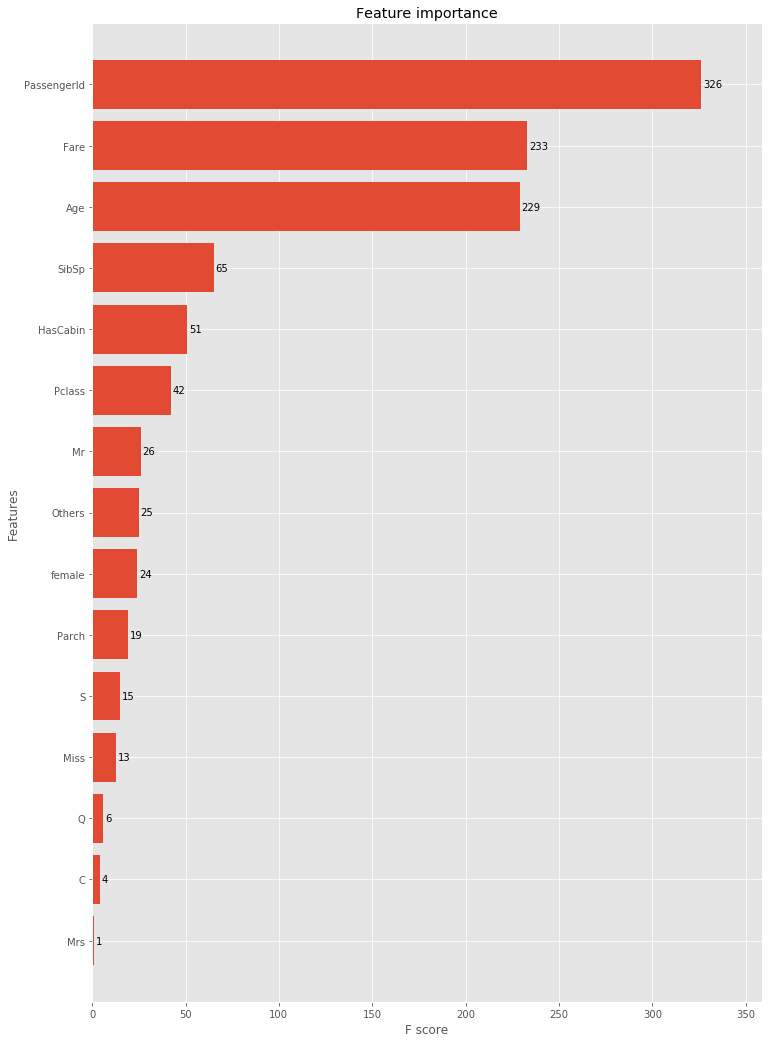

In [55]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=50, height=0.8, ax=ax, importance_type='weight')
plt.show()

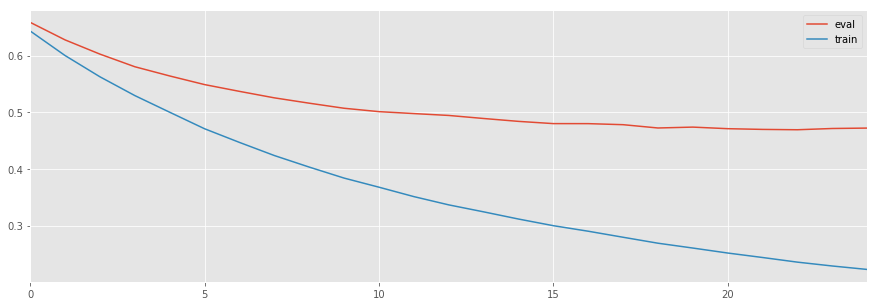

In [56]:
pd.DataFrame({'eval': evals_result['eval']['logloss'], 'train': evals_result['train']['logloss']}).plot(figsize=(15,5))